In [1]:
%matplotlib inline
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

Get a classification dataset.
We will use the Iris dataset, however will just use the first two features for visualization purposes

In [2]:
iris = load_iris()
x = iris.data[:, :2]
y = iris.target

Define the KNN algorithm

In [3]:
def knn_classifier(x_train, y_train, x_test, k=1):
    assert x_test.shape[0] == 1, "only evaluate a singe test point at once."
    # get the indicies of the k nearest neighbours to x_test
    dist = np.sqrt(np.sum(np.square(x_train-x_test), axis=1))
    i_nn = np.argpartition(dist, kth=k)[:k]
    # vote on the most common class
    vote, count = np.unique(y_train[i_nn], return_counts=True)
    y_test = vote[np.argmax(count)]
    return y_test

Plot the decision boundary by evaluating the classifier at each point on a mesh and assigning a color based on the class.

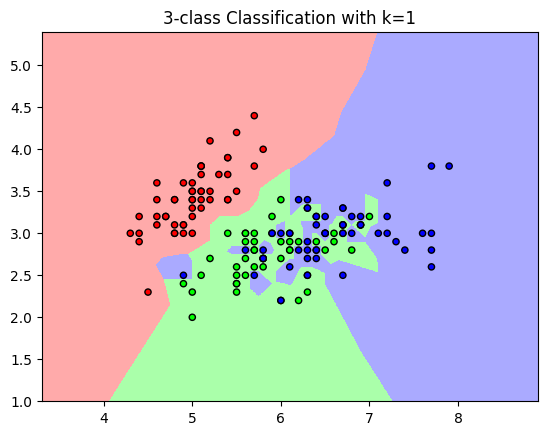

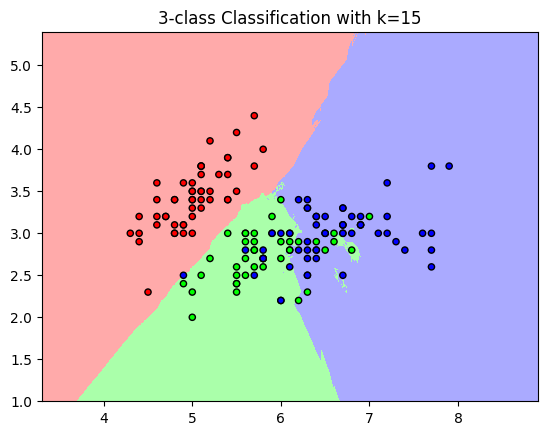

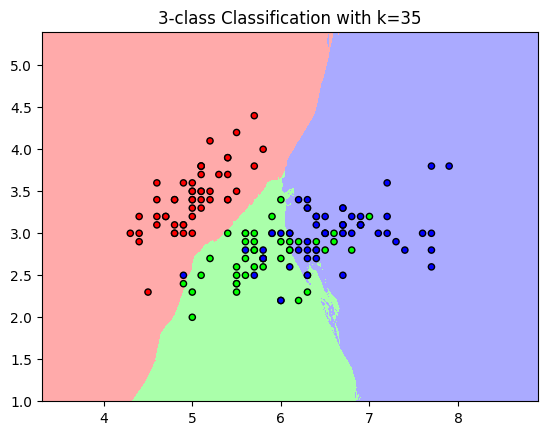

In [4]:
x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 1000),
                       np.linspace(x2_min, x2_max, 1000))

# loop over values of k
for k in [1, 15, 35]:    
    yy = np.zeros(xx1.size) # allocate array
    # make predictions on the mesh
    for i, x_test in enumerate(np.c_[xx1.ravel(), xx2.ravel()]):
        yy[i] = knn_classifier(x_train=x, y_train=y, x_test=x_test.reshape((1,-1)), k=k)
        
    # create a color plot
    yy = yy.reshape(xx1.shape)
    plt.figure()
    plt.pcolormesh(xx1, xx2, yy, cmap=cmap_light)

    # plot the training data
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max());
    plt.title("3-class Classification with k=%d" % k)